In [1]:
import numpy as np
from functools import reduce
from collections import namedtuple
from typing import List, Tuple, Union
import json

MAXSIDE = 100
MAXAREA = 40 * 40
MAXPIXELS = 40 * 40 * 5

import sys
import os

sys.path.append(os.path.abspath(os.path.join('..', 'src', 'arclang')))
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

from image import Image, Point
from function import *
from dsl import *

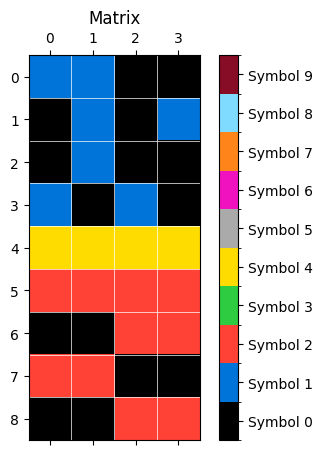

In [2]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/ce4f8723.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

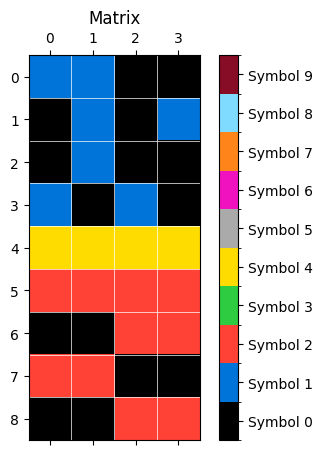

In [3]:
display_matrix(border(input_img)) 

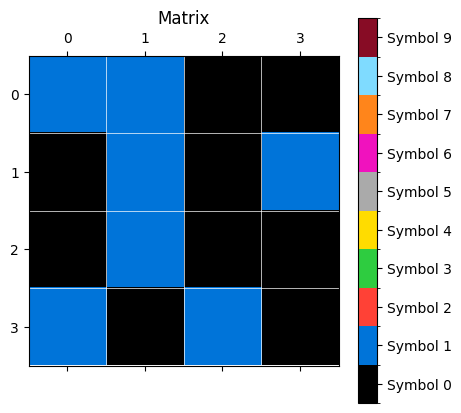

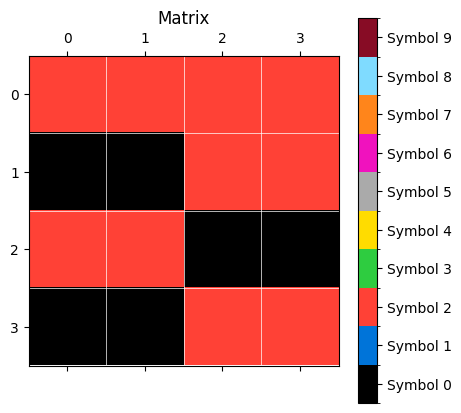

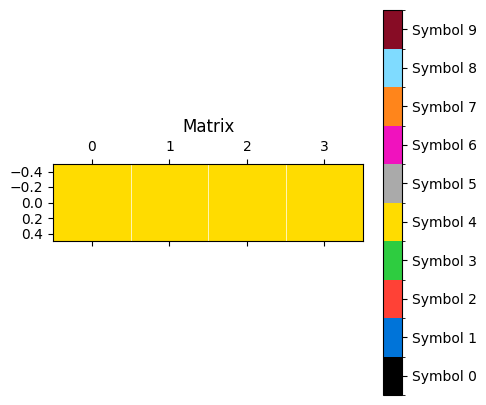

[None, None, None]

In [4]:
[display_matrix(i) for i in input_img.list_components("partition",True) ]

In [5]:
# def apply_to_selected_area(self, img: Image, func: Callable[[Image], Image],selected_area) -> Image:
#     if selected_area:
#         x1, y1, x2, y2 = selected_area
#         selected = img.sub_image(Point(x1, y1), Point(x2-x1, y2-y1))
#         modified = func(selected)
#         result = img.copy()
#         result.mask[y1:y2, x1:x2] = modified.mask
#         return result
#     return func(img)


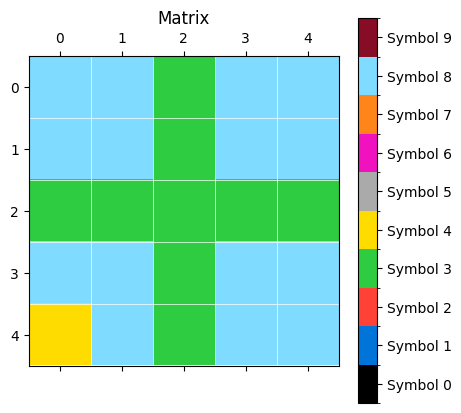

In [6]:
path = "/home/sai/Desktop/arc/ARC-AGI/data/training/2dc579da.json"
with open(path,"r") as f:
    data_ce9 = json.loads(f.read())
img_mask = data_ce9["train"][0]["input"]
img_mask = np.array(img_mask)
y,x = img_mask.shape
input_img= Image(0,0,x,y,img_mask)
display_matrix(input_img)

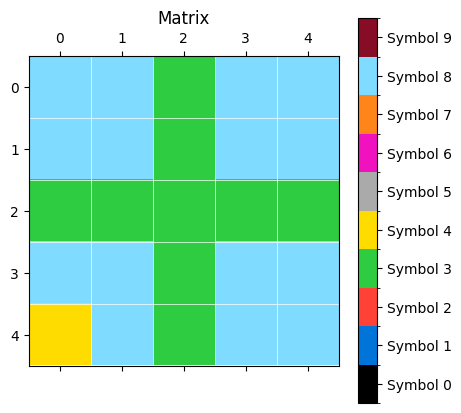

[None]

In [7]:
[display_matrix(i) for i in input_img.aggressive_connected_components(3) ]

In [9]:
[display_matrix(i) for i in input_img.list_distinct_components() ]

[]

In [24]:
def border(a: Image) -> Image:
    if a.w * a.h == 0:
        return Image()  # Return an empty image for empty input

    # Create padded array
    padded = np.pad(a.mask, pad_width=1, mode='constant', constant_values=0)
    
    # Create arrays for neighboring pixels
    neighbors = np.array([padded[:-2, :-2], padded[:-2, 1:-1], padded[:-2, 2:],
                          padded[1:-1, :-2], padded[1:-1, 2:],
                          padded[2:, :-2], padded[2:, 1:-1], padded[2:, 2:]])
    print(neighbors)
    # Check if any neighbor is different (including 0)
    is_border = np.any(neighbors != padded[1:-1, 1:-1][:, :, np.newaxis], axis=0)
    
    # Create border mask
    border_mask = (a.mask != 0) & is_border
    
    # Create new image with border
    ret = Image(a.x, a.y, a.w, a.h)
    ret.mask = np.where(border_mask, a.mask, 0)
    
    return ret

In [25]:
display_matrix(border(input_img))

[[[0 0 0 0 0]
  [0 8 8 3 8]
  [0 8 8 3 8]
  [0 3 3 3 3]
  [0 8 8 3 8]]

 [[0 0 0 0 0]
  [8 8 3 8 8]
  [8 8 3 8 8]
  [3 3 3 3 3]
  [8 8 3 8 8]]

 [[0 0 0 0 0]
  [8 3 8 8 0]
  [8 3 8 8 0]
  [3 3 3 3 0]
  [8 3 8 8 0]]

 [[0 8 8 3 8]
  [0 8 8 3 8]
  [0 3 3 3 3]
  [0 8 8 3 8]
  [0 4 8 3 8]]

 [[8 3 8 8 0]
  [8 3 8 8 0]
  [3 3 3 3 0]
  [8 3 8 8 0]
  [8 3 8 8 0]]

 [[0 8 8 3 8]
  [0 3 3 3 3]
  [0 8 8 3 8]
  [0 4 8 3 8]
  [0 0 0 0 0]]

 [[8 8 3 8 8]
  [3 3 3 3 3]
  [8 8 3 8 8]
  [4 8 3 8 8]
  [0 0 0 0 0]]

 [[8 3 8 8 0]
  [3 3 3 3 0]
  [8 3 8 8 0]
  [8 3 8 8 0]
  [0 0 0 0 0]]]


ValueError: operands could not be broadcast together with shapes (8,5,5) (5,5,1) 

In [26]:
# https://arxiv.org/pdf/2403.02944

# https://arxiv.org/pdf/2403.02944